In [101]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

# p-terphenyl crystals

## calculations

In [75]:
wavelength = np.array([614.076, 614.090])[None, :] #nm
wavelength /= 1e7 #cm
nubar = 1 / wavelength
print(nubar, np.diff(nubar))

spacing = np.array([0.5, 4])[:, None] #cm
reflectance = np.array([.9, .939])[:, None]
absorbance = .001
transmittance = 1 - reflectance - absorbance
p = np.array([16284, 130273])[:, None]

coFin = 4 * reflectance / (1 - reflectance) ** 2

nEff = 1.49 * np.sqrt(coFin)
print("N_eff", list(nEff.flat))

theta = np.arccos(p * wavelength / (2 * spacing))

print("dlambda/lambda", list((1/(np.pi * p * np.sqrt(coFin))).flat))

print('Dlambda_FSR\n', wavelength * 1e7 / p)

print('Dnubar_FSR\n', 1/(2 * spacing * np.cos(theta)))
transmission = 1 / ((1 + absorbance / transmittance) ** 2 * (1 + coFin * np.sin(np.pi * p) ** 2))
print('transmission', list(transmission.flat), np.prod(transmission))

print(theta * 180 / np.pi)

[[16284.62926413 16284.25800778]] [[-0.37125635]]
N_eff [28.270762281905316, 47.33901587569755]
dlambda/lambda [1.0302385184739012e-06, 7.69064484571405e-08]
Dlambda_FSR
 [[0.03771039 0.03771125]
 [0.00471376 0.00471387]]
Dnubar_FSR
 [[1.00003864 1.00001584]
 [0.12500387 0.12500102]]
transmission [0.9800999999999999, 0.9674818597151305] 0.9482289707067992
[[0.50369377 0.32253037]
 [0.45089856 0.23157542]]


## sketch

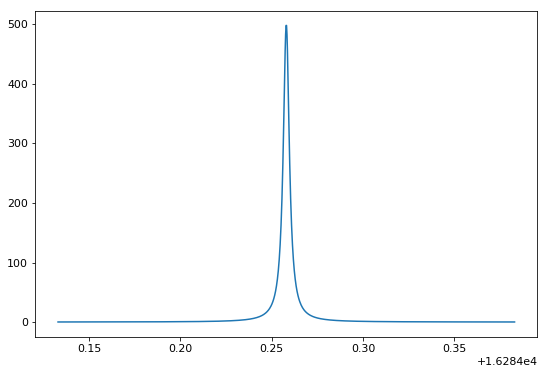

In [102]:
def lorentzian(freq, gamma, omega):
    return(gamma/((freq-omega)**2+gamma**2))

omega = 16284.25800778
FSR = 0.12500102
f = np.linspace(omega - FSR, omega + FSR, 1000)
plt.plot(f, lorentzian(f, 0.002, omega))

## adequate resolution?

There is adequate resolution in this configuration, the first etalon provides one wavenumber of FSR, thus we will not see the other peak. The second etalon provides a fine enough resolution to resolve out the peak.

# Absorption experiment

## intensity

The variation in intensity is largely what I'd expect for a low reflectance etalon (~2-3%, perhaps). The fact that it affects both the reference and sample with approximately equal variation lends credence to the assertion that this is an etalon.

## position of fringes

In [92]:
wavelength = np.array([489, 489.5])
wavelength /= 1e7
nubar = 1 / wavelength
print(np.diff(nubar) / 6)

print(np.arccos(1/(3.5 * 2 * 1)) * 180 / np.pi)
print(np.arccos(1/(.5 * 2 * 1)) * 180 / np.pi)

[-3.48142624]
81.78678929826182
0.0


The fringes are spaced at approximatly 3.5 wn. This corresponds to an unrealistic angle of incidence required to match the FSR.
At normal incidence, fringes would be spaced every 0.5 wn.

# Environmental chemistry

## effective path length

In [95]:
spacing = 100 #cm
reflectance = .9999
absorbance =  .00008
transmittance = 1 - reflectance - absorbance

coFin = 4 * reflectance / (1 - reflectance) ** 2

nEff = 1.49 * np.sqrt(coFin)
print("N_eff (m)", nEff / 100)

N_eff (m) 297.9850996275143


## concentration

In [98]:
conc = 1e-3 / (nEff * 2e3)
print(conc, 'mol/liter')
conc *= 6.022e23
conc /= 1000
print('%0.3e molecule/cm^3' % conc)


1.6779362479030238e-11 mol/liter
1.010e+10 molecule/cm^3


## incident light emerge

All of the incident light will either be absorbed or emerge (Assuming the etalon is well tuned to the frequency of incident light)

If we assume an absorbance of 1e-3, then the 1e-3 = log(Io/I)
equates to 99.77 % of the light emerging